## MEMBRES:
### PAPE IBRAHIMA KONATE GNINGUE
### HAMADY SAKANOKO

# Projet de Python 
## DIC1 2022-2023, GIT/EPT
### A noter que ce document regroupe d'une manière générale les exercices et certains tests de fonctions implémentées.
#### NB : la qualité de votre code et le respect des PEP 8 et 257 seront pris en compte.

Exercice 1 :

1. Écrire une fonction get_primes qui prend en entrée une liste d’entiers et qui renvoie la
liste des nombres premiers contenus dans cette liste. On rappelle que 2 est le plus petit
nombre premier.
2. Écrire une fonction next10primes qui prend en entrée un nombre entier n et qui renvoie
la liste des 10 premiers nombres premiers strictement supérieurs à n.
3. Écrire de deux façon différentes une fonction get_head qui prend en entrée un dictionnaire avec des noms d’employés comme clés et leur salaire annuel comme valeur. La
fonction doit retourner le nom de l’employé ayant le salaire annuel le plus élevé.<br>
Exemple : si le dictionnaire d’entrée est "Alice" : 50000, "Bob" : 60000, "Charlie" :
40000, la fonction doit retourner "Bob". On complétera

1. Écrire une fonction get_primes qui prend en entrée une liste d’entiers et qui renvoie la
liste des nombres premiers contenus dans cette liste. On rappelle que 2 est le plus petit
nombre premier.


In [336]:
#1) Une manière de tester la primalité
def primee(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

In [337]:
#1) Une autre manière de tester la primalité
def prime(n):
    if n>=2:
        return all(n%i!=0 for i in range(2, n))
    return False

In [338]:
#1)
def get_primes(liste:list):
    return list(filter(prime, liste))

##### TEST

In [275]:
get_primes(list(range(30)))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

2. Écrire une fonction next10primes qui prend en entrée un nombre entier n et qui renvoie
la liste des 10 premiers nombres premiers strictement supérieurs à n.


In [339]:
#2)
def next10primes(n:int):
    L=[]
    while len(L)<10:
        if prime(n+1):
            L.append(n+1)
        n+=1
    return L

##### TEST

In [292]:
V=next10primes(5)
V

[7, 11, 13, 17, 19, 23, 29, 31, 37, 41]

3. Écrire de deux façon différentes une fonction get_head qui prend en entrée un dictionnaire avec des noms d’employés comme clés et leur salaire annuel comme valeur. La
fonction doit retourner le nom de l’employé ayant le salaire annuel le plus élevé.<br>
Exemple : si le dictionnaire d’entrée est "Alice" : 50000, "Bob" : 60000, "Charlie" :
40000, la fonction doit retourner "Bob". On complétera

In [286]:
#3) 1ère manière
def get_head1(dico:dict):
    Max=max(dico.values())
    l=[]
    for key,valeurs in dico.items():
        if valeurs==Max:
            l.append(key)
    return l

##### TEST

In [279]:
d={"Alice" : 50000, "Bob" : 60000, "Charlie" : 40000,"Ali":70000,"Binta":65000,"Daouda":70000}
get_head1(d)

['Ali', 'Daouda']

In [290]:
#3) 2ème manière
def get_head2(dico:dict):
    return [keys for keys in dico if dico[keys]==max(dico.values())]

##### TEST

In [291]:
get_head2(d)

['Ali', 'Daouda']

## Exercice 2 : Clustering

Supposons que vous avez un dataset constitué de N points en deux dimensions (i.e chaque point
est un couple). Vous voulez diviser ces points en n clusters distincts.
1. Ecrire une fonction rand_dataset qui prend en entrée en entier n et retourne aléatoirement une liste de n points (a,b) où 0 ≤ a, b ≤ 10.
2. Ecrire une fonction distance qui prend en entrée deux points et retourne la distance
euclidienne. On rappelle que distance((x1, y1),(x2, y2)) = p (x1 − x2)<sup>2</sup> + (y1 − y2)<sup>2</sup>
3. Ecrire une fonction get_clusters qui prend en entrée une liste des centres des clusters
(les centres sont des couples) et le dataset et retourne un dictionnaire où <br>
— la clé représente le centre du cluster et <br>
— la valeur représente la liste de tous les points du dataset qui sont plus proches de ce
centre.
4. Ecrire une fonction plot_dataset qui prend en entrée un dataset et une liste des centres
des clusters et trace un graphique où <br>
— les couleurs des centres sont distinctes. <br>
— les points d’un cluster ont la même couleur mais on doit pouvoir faire une distinction
entre le centre et les autres points du cluster.

1. Ecrire une fonction rand_dataset qui prend en entrée en entier n et retourne aléatoirement une liste de n points (a,b) où 0 ≤ a, b ≤ 10.


In [1]:
from random import random
#1)
def rand_dataset(n:int):
    return [(10*random(),10*random()) for i in range(n)]

##### TEST

In [2]:
rand_dataset(5)

[(6.835796737440515, 2.683259921491431),
 (1.4458477311739482, 8.776016303592721),
 (9.234901157581305, 0.8457039330078808),
 (3.527448230193885, 4.678891401702135),
 (8.584030036433628, 0.10859357223771404)]

2. Ecrire une fonction distance qui prend en entrée deux points et retourne la distance
euclidienne. On rappelle que distance((x1, y1),(x2, y2)) = p (x1 − x2)<sup>2</sup> + (y1 − y2)<sup>2</sup>


In [3]:
#2)
def distance(A:tuple,B:tuple):
    if len(A)==len(B):
        return (sum([(A[i]-B[i])**2  for i in range(len(A))]))**0.5
    print("Veuillez entrez deux tuples de même taille.")

##### TEST

In [4]:
distance((2, 9), (6, 7))

4.47213595499958

In [5]:
distance((-1, 1), (1, 1))

2.0

3. Ecrire une fonction get_clusters qui prend en entrée une liste des centres des clusters
(les centres sont des couples) et le dataset et retourne un dictionnaire où <br>
— la clé représente le centre du cluster et <br>
— la valeur représente la liste de tous les points du dataset qui sont plus proches de ce
centre.

In [6]:
#3)
def get_clusters1(centers:list,dataset:list):
    clusters={}
    for i in centers:
        clusters[i]=[]
    for j in dataset:
        m=min([distance(j,i) for i in centers])
        for i in centers:
            if m==distance(j,i):
                clusters[i].append(j)
    return clusters

In [7]:
#3)
def get_clusters(centers:list,dataset:list):
    clusters={}
    for i in centers:
        clusters[i]=[]
    [clusters[i].append(j) for j in dataset for i in centers \
     if distance(j,i)==min([distance(j,i) for i in centers])]
    return clusters

### TEST

In [13]:
dataset=[(-3,6),(1,7),(-8,3),(3,2),(11,-2),(3.6,-4),(6,0)]
centers=rand_dataset(3)
classes=get_clusters1(centers,dataset)
classes

{(5.761794528893972, 6.346691826631266): [(1, 7)],
 (6.6807642374740706, 5.150559565665759): [(11, -2)],
 (2.2551680136718755, 1.1303302818011651): [(-3, 6),
  (-8, 3),
  (3, 2),
  (3.6, -4),
  (6, 0)]}

In [14]:
classses=get_clusters(centers,dataset)
classses

{(5.761794528893972, 6.346691826631266): [(1, 7)],
 (6.6807642374740706, 5.150559565665759): [(11, -2)],
 (2.2551680136718755, 1.1303302818011651): [(-3, 6),
  (-8, 3),
  (3, 2),
  (3.6, -4),
  (6, 0)]}

4. Ecrire une fonction plot_dataset qui prend en entrée un dataset et une liste des centres
des clusters et trace un graphique où <br>
— les couleurs des centres sont distinctes. <br>
— les points d’un cluster ont la même couleur mais on doit pouvoir faire une distinction
entre le centre et les autres points du cluster.

In [70]:
import matplotlib.pyplot as plt

def plot_dataset(centers:list,dataset:list):
    classes=get_clusters(centers, dataset)
    colors = plt.cm.tab10.colors
    for i, cluster in enumerate(classes):
        x = [cluster[0]] + [classes[cluster][j][0] for j in range(len(classes[cluster]))]
        y = [cluster[1]] + [classes[cluster][j][1] for j in range(len(classes[cluster]))]
        plt.scatter(x[0],y[0],marker="*", color=colors[i],s=250)
        plt.scatter(x[1:],y[1:],marker="o", color=colors[i])
    plt.show()


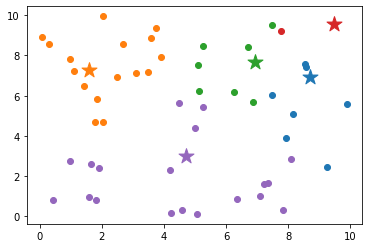

In [72]:
plot_dataset(rand_dataset(5),rand_dataset(50))

## Exercice 3 :
Vous travaillez pour une entreprise qui possède une grande base de données
contenant des informations sur des personnes, notamment leur nom, prénom, âge, adresse et
numéro de téléphone. Votre tâche consiste à écrire un module Python qui permet de gérer cette
base de données.
Le module doit contenir une fonction qui permet de :
1. Ajouter une personne à la base de données via son nom, prénom, âge, adresse et numéro
de téléphone.
2. Modifier les informations d’une personne existante via son nom et en permettant de
modifier son prénom, son âge, son adresse ou son numéro de téléphone. Autrement dit,
la fonction pourrait prendre en entrée le nom et un dictionnaire des paramètres à mettre
à jour.
3. Supprimer une personne de la base de données via son nom.
4. Rechercher une personne dans la base de données via son nom et en affichant toutes ses
informations sous la forme :
Nom : <nom> Prenom : <Prenom> Age : <Age> Adresse : <Adresse> Numero : <Numero>
5. Afficher la liste de toutes les personnes présentes dans la base de données sous la forme :
Nom : <nom> Prenom : <Prenom> Age : <Age> Adresse : <Adresse> Numero : <Numero>
Nom : <nom> Prenom : <Prenom> Age : <Age> Adresse : <Adresse> Numero : <Numero>
etc.

# Remarque :
## Partie I :
On suppose que la base de données est réprésentée sous forme de liste et
chaque enregistrement dans la base est réprésenté sous forme de dictionnaire avec comme
clés : nom, prenom, age, adresse, et numero.

1)Ajouter une personne à la base de données via son nom, prénom, âge, adresse et numéro de 
 téléphone.

In [109]:
def ajouter(DATABASE:list,**infos):
    """
    
    """
    for dictionnaire in DATABASE:
        if infos["nom"] == list(dictionnaire.values())[0]:
            name = infos["nom"]
            print(f"Le nom {name}  est dejà sur la base")
            return 
    else:
        clefs=['nom', 'prenom', 'age', 'addresse', 'numero']
        if all(k in list(infos.keys()) for k in clefs):
            DATABASE.append({k:infos[k] for k in clefs})
            print("Ajout avec succes!\n")
        else:
            print(f"Le dictionnaire des informations personnelles doit avoir ces clés {clefs}\n")

In [111]:
ma_base1=[]
ma_base2=[]
ajouter(ma_base1,nom="saka",prenom="hama",age=15,addresse="soutouta",numero=785976026)
ajouter(ma_base1,nom="sakano",prenom="hamad",age=15,addresse="souta",numero=785976026)
ajouter(ma_base1,nom="Gning",prenom="Ibrahima",age=5,addresse="Dakar",numero=77969676)

Ajout avec succes!

Ajout avec succes!

Ajout avec succes!



In [112]:
hamdy=dict(nom="Ndiaye",prenom="hamdy",age=25,addresse="manminlon",numero=777776026,ln="haha")
ajouter(ma_base1,**hamdy)

Ajout avec succes!



In [113]:
ajouter(ma_base1,**hamdy)

Le nom Ndiaye  est dejà sur la base


2) Modifier les informations d’une personne existante via son nom et en permettant de modifier 
   son prénom, son âge, son adresse ou son numéro de téléphone. Autrement dit, la fonction 
   pourrait prendre en entrée le nom et un dictionnaire des paramètres à mettre à jour.

In [83]:

def modifier(DATABASE:list, name:str, **infos):
    clefs = ['nom', 'prenom', 'age', 'addresse', 'numero']
    for dictionnaire in DATABASE:
        if name == list(dictionnaire.values())[0]:
            clefs_modifier = [k for k in clefs if k in list(infos.keys())]
            for i in clefs_modifier:
                dictionnaire[i] = infos[i]
            print("Modification avec succes!\n")
            return 
    else:
        print(f"cette personne du nom de :{name} n'est pas enregistrer dans la base")
        

In [114]:
modifier(ma_base1,"saka",nom="sakanoko",prenom="hamady",numero=785976030)

Modification avec succes!



3)Supprimer une personne de la base de données via son nom.

In [85]:
def supprimer(DATABASE:list ,name:str):
    for dictionnaire in DATABASE:
        if name==list(dictionnaire.values())[0]:
            DATABASE.remove(dictionnaire)
            print("Suppression avec succes!\n")
            return
    else:
        print(f"la personne du nom de :{name} n'existe dans la base, pour la supprimer\n")


In [115]:
supprimer(ma_base1,"sakano")

Suppression avec succes!



4) Rechercher une personne dans la base de données via son nom et en affichant toutes ses 
informations sous la forme : Nom : Prenom : Age : Adresse : Numero :   

In [87]:
# 4)           
def recherche(DATABASE:list, name:str):
    """
    
    """
    for dictionnaire in DATABASE:
        if name == list(dictionnaire.values())[0]:
            print("les informations de la personne cherchée sont: \n",dictionnaire)
            return
    else:
        print(f"Desolé, la personne du nom de :{name} n'est pas enregistrer dans la base")

In [116]:
recherche(ma_base1,"sakanoko")

les informations de la personne cherchée sont: 
 {'nom': 'sakanoko', 'prenom': 'hamady', 'age': 15, 'addresse': 'soutouta', 'numero': 785976030}


In [117]:
recherche(ma_base1,"sakno")

Desolé, la personne du nom de :sakno n'est pas enregistrer dans la base


5) Afficher la liste de toutes les personnes présentes dans la base de données sous la forme :
 Nom : Prenom : Age : Adresse : Numero : Nom : Prenom : Age : Adresse : Numero : etc.

In [154]:
def afficher(DATABASE:list):
    for dictionnaire in DATABASE:
        print(dictionnaire)
        

In [155]:
afficher(ma_base1)

{'nom': 'sakanoko', 'prenom': 'hamady', 'age': 15, 'addresse': 'soutouta', 'numero': 785976030}
{'nom': 'Gning', 'prenom': 'Ibrahima', 'age': 5, 'addresse': 'Dakar', 'numero': 77969676}
{'nom': 'Ndiaye', 'prenom': 'hamdy', 'age': 25, 'addresse': 'manminlon', 'numero': 777776026}


## Partie II :
On suppose que l’on a une base de données SQLite nommée database.sqlite3.
On devra créer la base et une table convenablement.

1)Ajouter une personne à la base de données via son nom, prénom, âge, adresse et numéro de 
 téléphone.

In [337]:
import sqlite3

def Ajouter(ma_base: str, **infos_perso):
    clefs = ['nom', 'prenom', 'age', 'addresse', 'numero']
    for k in clefs:
        if k not in infos_perso:
            print(f"L'opération d'ajout a échoué. Veuillez fournir la clé suivante : {k}")
            return
        elif not isinstance(infos_perso[k], (str, int)):
            print(f"L'opération d'ajout a échoué. La valeur pour la clé '{k}' doit être un nombre entier ou une chaîne de caractères.")
            return
        elif k == 'age' and not isinstance(infos_perso[k], int):
            print(f"L'opération d'ajout a échoué. L'âge doit être un nombre entier.")
            return
    
    try:
        conn = sqlite3.connect(ma_base + ".db")
        curseur = conn.cursor()
        curseur.execute("CREATE TABLE IF NOT EXISTS personne(nom TEXT PRIMARY KEY, prenom TEXT, age INTEGER, adresse TEXT, numero INTEGER)")
        curseur.execute("INSERT INTO personne(nom, prenom, age, adresse, numero) VALUES(?,?,?,?,?)", tuple(infos_perso[k] for k in clefs))
        conn.commit()
        print("Opération réussie!")
    except sqlite3.IntegrityError:
        print("Une erreur est survenue. Le nom existe déjà dans la base de données.")
    except sqlite3.Error as e:
        print(f"Une erreur est survenue lors de l'ajout : {e}")
    finally:
        curseur.close()
        conn.close()


In [338]:
Ajouter(ma_base="base1",nom="sakann",prenom="hama",age=15,addresse="soutouta",numero=785976026)
Ajouter(ma_base="base1",nom="sakannon",prenom="hamad",age=15,addresse="souta",numero=785976026)

Opération réussie!
Une erreur est survenue. Le nom existe déjà dans la base de données.


In [170]:
Ajouter(ma_base="base1",nom="Gninng",prenom="Ibrahima",age=5,addresse="Dakar",numero=77969676)

Opération réussie!


In [341]:
hamdy=dict(nom="Ndiaye1",prenom="hammdy",age=25,addresse="manminlon",numero=777776026,ln="haha")
Ajouter(ma_base="base1",**hamdy)

Opération réussie!


In [342]:
Ajouter(ma_base="base1",**hamdy)

Une erreur est survenue. Le nom existe déjà dans la base de données.


2) Modifier les informations d’une personne existante via son nom et en permettant de modifier 
   son prénom, son âge, son adresse ou son numéro de téléphone. Autrement dit, la fonction 
   pourrait prendre en entrée le nom et un dictionnaire des paramètres à mettre à jour.

In [386]:
import sqlite3

def Modifier(ma_base: str, name: str, **infos_perso):
    clefs = ['nom', 'prenom', 'age', 'addresse', 'numero']
    if not all(k in infos_perso for k in clefs):
        print(f"L'opération de modification a échoué. Veuillez fournir les informations suivantes : {clefs}")
        return
    
    try:
        age = int(infos_perso['age'])
    except (ValueError, TypeError):
        print("L'âge doit être un nombre entier")
        return
    
    
    try:
        conn = sqlite3.connect(ma_base + ".db")
        curseur = conn.cursor()
        noms = curseur.execute("SELECT nom FROM personne")
        if (name,) in noms.fetchall():
            valeurs=[infos_perso[k] for k in clefs]
            valeurs.append(name)
            curseur.execute("UPDATE personne SET nom=?, prenom=?, age=?, adresse=?, numero=? WHERE nom=?", tuple(valeurs))
            conn.commit()
            print("Opération réussie!")
        else:
            print("operation de modification a échoué! Car ce nom n'existe pas sur cette base.")
    except sqlite3.Error as e:
        print("Une erreur est survenue lors de la modification, peut être le nouveau " + \
              f" que vous voulez mettre existe dejà sur la base: {e}")
    finally:
        curseur.close()
        conn.close()


In [398]:
personne1={"nom":"sakanoko1","prenom":"hamady","age":25,"addresse":"manminlon","numero":785976030}
Modifier("base1","saka",**personne1)

Opération réussie!


In [395]:
Modifier("base1","saka",**personne1)

operation de modification a échoué! Car ce nom n'existe pas sur cette base.


In [400]:
Modifier("base1","sakano",**personne1)

Une erreur est survenue lors de la modification, peut être le nouveau  que vous voulez mettre existe dejà sur la base: UNIQUE constraint failed: personne.nom


## 3)Supprimer une personne de la base de données via son nom.

In [357]:
#3)
def Supprimer(ma_base, name: str):
    conn = sqlite3.connect(str(ma_base)+".db")
    curseur = conn.cursor()
    noms = curseur.execute("SELECT nom FROM personne")
    if (name,) in noms.fetchall():
        curseur.execute("DELETE FROM personne WHERE nom=?",(name,))
        print("Opération réussie!")

    else:
        print("operation de suppression a échoué! Car ce nom n'existe pas sur cette base.")
    conn.commit()
    curseur.close()
    conn.close()

In [382]:
Supprimer("base1","sakan")

Opération réussie!


4) Rechercher une personne dans la base de données via son nom et en affichant toutes ses 
informations sous la forme : Nom : Prenom : Age : Adresse : Numero :   

In [366]:
#4)
def Recherche(ma_base, name: str):
    conn = sqlite3.connect(str(ma_base)+".db")
    curseur = conn.cursor()
    noms = curseur.execute("SELECT nom FROM personne")
    noms = noms.fetchall()
    if (name,) in noms:
        personne = curseur.execute("SELECT * FROM personne WHERE nom=?", (name,)).fetchone()
        print("les informations de la personne cherchée sont: \n")
        print(f"nom:{personne[0]}, prenom:{personne[1]}, age:{personne[2]}" + \
              f"addresse:{personne[3]}, numero:{personne[4]}")
        conn.commit()
        curseur.close()
        conn.close()
    else:
        print(f"cette personne du nom de :{name} n'est pas enregistrer dans la base")

In [367]:
Recherche(ma_base="base1",name="Ndiayee")

les informations de la personne cherchée sont: 

nom:Ndiayee, prenom:hammdy, age:25addresse:manminlon, numero:777776026


5) Afficher la liste de toutes les personnes présentes dans la base de données sous la forme :
 Nom : Prenom : Age : Adresse : Numero : Nom : Prenom : Age : Adresse : Numero : etc.

In [401]:
#5)
def Afficher(ma_base):
    conn = sqlite3.connect(str(ma_base)+".db")
    curseur = conn.cursor()
    table = curseur.execute("SELECT * FROM personne")
    table=table.fetchall()
    if len(table) > 0:
        for personne in table:
            print(f"nom:{personne[0]}, prenom:{personne[1]}, age:{personne[2]}" + \
                  f" addresse:{personne[3]}, numero:{personne[4]}")
        conn.commit()
        curseur.close()
        conn.close()
    else:
        print("La base entree est introuvable. ")

In [402]:
Afficher("base1")

nom:sakanoko1, prenom:hamady, age:25 addresse:manminlon, numero:785976030
nom:sakano, prenom:hamad, age:15 addresse:souta, numero:785976026
nom:Gning, prenom:Ibrahima, age:5 addresse:Dakar, numero:77969676
nom:Ndiaye, prenom:hamdy, age:25 addresse:manminlon, numero:777776026
nom:sakanoko, prenom:hamady, age:25 addresse:manminlon, numero:785976030
nom:Gninng, prenom:Ibrahima, age:5 addresse:Dakar, numero:77969676
nom:Ndiayee, prenom:hammdy, age:25 addresse:manminlon, numero:777776026
nom:Ndiaye1, prenom:hammdy, age:25 addresse:manminlon, numero:777776026


# Exercice 4 : Sur les fichiers :
1. Écrire une une fonction qui prend en entrée le path (chemin) d’un fichier texte et retourne
le nombre d’occurrences de chaque mot dans le fichier sous forme de dictionnaire.
2. Écrire une une fonction qui prend en entrée le path d’un fichier texte et crée un nouveau
fichier html correct avec le même nom et d’extension .html où le contenu de la balise
<body> est celui du fichier texte. On devra enregistrer dans le même dossier que le
fichier en entrée.
3. Écrire une une fonction qui prend en entrée le path d’un fichier et un argument nommé
obligatoire compress (un booléen)
— si compress=True : la fonction doit compresser le fichier et le sauvegarder dans un
nouveau fichier mais dans le même dossier que le fichier en entrée.<br>
— si compress=False : la fonction doit décompresser le fichier et le sauvegarder dans
un nouveau fichier mais dans le même dossier que le fichier en entrée.
On pourra utiliser une bibliothèque de compression (par exemple, gzip ou zlib)

1. Écrire une une fonction qui prend en entrée le path (chemin) d’un fichier texte et retourne
le nombre d’occurrences de chaque mot dans le fichier sous forme de dictionnaire.


In [392]:
#1
def ma_fonction(path:str):
    with open(path+".txt","r") as fichier:
        contenu=fichier.read()
        for i in "!@#$%^&*()_+-=[]{}\\|;:\",.<>/?":
            contenu=contenu.replace(i,"")
    mots=contenu.replace("\n"," ").split(" ")
    dico={}
    for x in mots:
        if x not in (" "):
            dico[x]=contenu.count(x)
    return dico

##### TEST

In [393]:
ma_fonction('C:/Users/HP/Desktop/DIC1#48/EPS/test')

{'bonjour': 1,
 "j'ai": 1,
 'besoin': 1,
 'juste': 1,
 'de': 1,
 'tester': 1,
 'les': 1,
 'fichiers': 1,
 'okay': 1,
 'merci': 1}

2. Écrire une une fonction qui prend en entrée le path d’un fichier texte et crée un nouveau
fichier html correct avec le même nom et d’extension .html où le contenu de la balise
<body> est celui du fichier texte. On devra enregistrer dans le même dossier que le
fichier en entrée.


In [46]:
#2)
def page_min(corps:str):
    code_min="""<!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Document</title>
    </head>
    <body>\n"""+corps+"""\n</body>
    </html>
        """
    return code_min 

In [34]:
def txt_to_html(path:str):
    with open(path+".txt","r") as fichiertext:
        contenu=fichiertext.read()
    with open(path+".html","w") as fichierhtml:
        fichierhtml.write(page_min(contenu))

##### TEST

In [32]:
txt_to_html('C:/Users/HP/Desktop/DIC1#48/EPS/test')

3. Écrire une une fonction qui prend en entrée le path d’un fichier et un argument nommé
obligatoire compress (un booléen)
— si compress=True : la fonction doit compresser le fichier et le sauvegarder dans un
nouveau fichier mais dans le même dossier que le fichier en entrée.<br>
— si compress=False : la fonction doit décompresser le fichier et le sauvegarder dans
un nouveau fichier mais dans le même dossier que le fichier en entrée.
On pourra utiliser une bibliothèque de compression (par exemple, gzip ou zlib)

In [90]:
#3)
import zlib
def compression(path:str,*,compress=True):
    with open(path+".txt","rb") as fichiertext:
        contenu=fichiertext.read()
    if compress==True:
        with open(path+"_compress.txt","wb") as fichier:
            fichier.write(zlib.compress(contenu))
    elif compress==False:
        with open(path+"_decompress.txt","wb") as fichier:
            fichier.write(zlib.decompress(contenu))
    else:
        pass

##### TEST

In [91]:
compression('C:/Users/HP/Desktop/DIC1#48/EPS/test',compress=True)

In [92]:
compression('C:/Users/HP/Desktop/DIC1#48/EPS/test_compress',compress=False)

## Exercice 5 :
1. Conception de classe : Écrire une classe qui représente un livre. Le livre doit avoir un
titre, un auteur, une date de publication et un identifiant unique. La classe doit avoir des
méthodes pour récupérer et modifier ces attributs, ainsi qu’une méthode pour afficher
les informations du livre.
2. Sur l’héritage de classe : Écrire une classe qui représente un livre audio, qui hérite de
la classe de livre que vous avez créée dans l’exercice précédent. Le livre audio doit avoir
en plus une durée et un narrateur. La classe doit avoir des méthodes pour récupérer
et modifier ces attributs, ainsi qu’une méthode pour afficher les informations du livre
audio.
##### Partie II) Écrire la documentation de la Partie I) . 
La documentation de chaque module
devra être générée de façon automatique. On choisira également un thème (différent du thème
par défaut) que l’on personnalisera.

### Partie I)
1) Conception de classe : Écrire une classe qui représente un livre. Le livre doit avoir un titre,un auteur, une date de publication et un identifiant unique. La classe doit avoir des méthodes pour récupérer et modifier ces attributs, ainsi qu’une méthode pour afficher les informations du livre.

In [32]:
from datetime import date, time


class Livre:
    identifiants=[]
    livres=[]
    def __init__(self, identifiant: int, titre: str, auteur :str, date_pub :str):
        if identifiant in Livre.identifiants:
            print("Un livre existe dejà avec ce identifiant ")
            for livre in Livre.livres:
                if livre.identifiant == identifiant:
                    self = livre
                    break
        else:
            self.identifiant = identifiant
            Livre.identifiants.append(identifiant)
            self.titre = titre
            self.auteur = auteur
            try:
                sep1 = date_pub.split("/")
                sep2 = date_pub.split("-")
                self.date_pub = date(int(sep1[0]), int(sep1[1]), int(sep1[2])) if "/" in date_pub \
                else date(int(sep2[0]), int(sep2[1]), int(sep2[2]))
            except ValueError:
                print("Il faut entrer la date de publication sous forme de 'aaaa-mm-jj' ou " + \
                "'aaaa/mm/jj'tout en sachant que les 'aaaa','mm' et 'jj' sont entiers " + \
                "et aaaa compris  entre 1 et 9999 et encore que les valeurs de 'mm' et " + \
                "'jj'peuvent exister \n A noter:\n 'aaaa'=année \n 'mm'=mois \n 'jj'=jour \n")
            except IndexError:
                print("Il faut obligatoirement entrer la date de publication sous forme de " 
                      +"'aaaa-mm-jj' ou 'aaaa-mm-jj' ")
            else:
                Livre.livres.append(self)

    #Les méthodes pour récupérer les attributs,
    
    def title(self):
        print(f"Le titre du livre est : {self.titre}")
        
    def autor(self):
        print(f"Le livre a comme auteur : {self.auteur}")
        
    def publication(self):
        print(f"Le livre est publié : {self.date_pub}")
        
    def identificateur(self):
        print(f"Le livre est ientifié par : {self.identifiant}")
       
    #Les méthodes pour modifier les attributs,    
    
    def modifier_title(self, title:str):
        try:
            self.titre=title
        except AttributeError:
            print("Mais le livre n'existe pas")
            
    def modifier_autor(self, autor:str):
        try:
            self.auteur=autor
        except AttributeError:
            print("Mais le livre n'existe pas")
            
    def modifier_publication(self, publication :str):
        try:
            sep1=publication.split("/")
            sep2=publication.split("-")
            self.date_pub= date(int(sep1[0]), int(sep1[1]), int(sep1[2])) if "/" in publication \
            else date(int(sep2[0]), int(sep2[1]), int(sep2[2]))
        except ValueError:
            print("Il faut entrer la date de publication sous forme de 'aaaa-mm-jj' ou " + \
            "'aaaa/mm/jj'tout en sachant que les 'aaaa','mm' et 'jj' sont entiers " + \
            "et aaaa compris  entre 1 et 9999 et encore que les valeurs de 'mm' et " + \
            "'jj'peuvent exister \n A noter:\n 'aaaa'=année \n 'mm'=mois \n 'jj'=jour \n")
        except IndexError:
            print("Il faut obligatoirement entrer la date de publication sous forme de " 
                  +"'aaaa-mm-jj' ou 'aaaa-mm-jj' ")
        except AttributeError:
            print("Mais le livre n'existe pas")

        
    def modifier_identificateur(self, identificateur: int):
        try:
            if self.identifiant in Livre.identifiants:
                Livre.identifiants.remove(self.identifiant)
                self.identifiant=identificateur
                Livre.identifiants.append(self.identifiant)
        except AttributeError:
            print("Mais le livre n'existe pas")

    def infos_livre(self):
        try:
            self.identifiant in Livre.identifiants
            print("Les informations de ce livre sont:")
            self.autor()
            self.title()
            self.publication()
            self.identificateur()
        except AttributeError:
            print("Mais le livre n'existe pas")

##### TEST

In [33]:
monliv1=Livre(1,"l'IA","samba","2023-4-2")
monliv2=Livre(2,"l'IA","samba","2023-4-2")
monliv3=Livre(3,"l'IA","samba","2023-4-2")
monliv4=Livre(4,"l'IA","samba","2023-4-2")

In [25]:
monlivx=Livre(3,"l'IA","samba","2023-4-2")

Un livre existe dejà avec ce identifiant 


In [28]:
monlivx.infos_livre()

Mais le livre n'existe pas


2) Sur l’héritage de classe : Écrire une classe qui représente un livre audio, qui hérite de la classe de livre que vous avez créée dans l’exercice précédent. Le livre audio doit avoir en plus une durée et un narrateur. La classe doit avoir des méthodes pour récupérer et modifier ces attributs, ainsi qu’une méthode pour afficher les informations du livre audio.

In [9]:
class LivreAudio(Livre):
    def __init__(self, identifiant: int, titre: str, auteur: str, date_pub: str, duree:str, narrateur:str):
        super().__init__(identifiant, titre, auteur, date_pub)
        self.narrateur = narrateur
        try:
            sep = duree.split(":")
            self.duree = time(int(sep[0]), int(sep[1]), int(sep[2])) 
        except ValueError:
            print("Il faut entrer la durée sous forme de 'hh:mn:ss' ou " + \
            "tout en sachant que les 'hh','mn' et 'ss' sont entiers  \n " +\
            " A noter:\n 'hh'=heure \n 'mn'=munite \n 'ss'=seconde \n")
        except IndexError:
            print("Il faut obligatoirement entrer la durée sous forme de " 
                  + "'hh:mn:ss' ")
      
    def duration(self):
        print(f"Le livre est un audio qui dure : {self.duree}")
        
    def narrator(self):
        print(f"Le livre est un audio et a comme narrateur : {self.narrateur}")
        
    def infos_livre(self):
        try:
            self.identifiant in Livre.identifiants
            super().infos_livre()
            self.duration()
            self.narrator()
        except AttributeError:
            print("Mais le livre n'existe pas")
            
    def modifier_duration(self, duree:str):
        try:
            self.identifiant in Livre.identifiants
            try:
                sep = duree.split(":")
                self.date_pub = time(int(sep[0]), int(sep[1]), int(sep[2])) 
            except ValueError:
                print("Il faut entrer la durée sous forme de 'hh:mn:ss' ou " + \
                "tout en sachant que les 'hh','mn' et 'ss' sont entiers \n " +\
                " A noter:\n 'hh'=heure \n 'mn'=munite \n 'ss'=seconde \n")
            except IndexError:
                print("Il faut obligatoirement entrer la durée sous forme de 'hh:mn:ss' ")
        except AttributeError:
            print("Mais le livre n'existe pas")
            
    def modifier_narrator(self, narrator: str):
        try:
            self.identifiant in Livre.identifiants
            self.narrateur = narrator
        except AttributeError:
            print("Mais le livre n'existe pas")

##### TEST

In [10]:
audio1 = LivreAudio(11,"l'IA","samba","2023-4-2","00:13:04","hamsa")
audio2 = LivreAudio(12,"l'IA","samba","2023-4-2","00:13:04","hamsa")
audio3 = LivreAudio(13,"l'IA","samba","2023-4-2","00:13:04","hamsa")

In [11]:
audio1.infos_livre()

Les informations de ce livre sont:
Le livre a comme auteur : samba
Le titre du livre est : l'IA
Le livre est publié : 2023-04-02
Le livre est ientifié par : 11
Le livre est un audio qui dure : 00:13:04
Le livre est un audio et a comme narrateur : hamsa


In [12]:
audion = LivreAudio(13,"l'IA","samba","2023-4-2","00:13:04","hamsa")

Un livre existe dejà avec ce identifiant donc, on peut pas le stocker avec ce même identifiant. 


In [14]:
audion.infos_livre()

Les informations de ce livre sont:
Le livre a comme auteur : samba
Le titre du livre est : l'IA
Le livre est publié : 2023-04-02
Le livre est ientifié par : 13
Le livre est un audio qui dure : 00:13:04
Le livre est un audio et a comme narrateur : hamsa
